This code reads a csv file and pre processes the file(labels+ encoding) and then performs the classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  
import numpy as np 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = '/content/drive/MyDrive/Original dataset/16-10-09.csv'
df = pd.read_csv(path)

In [ ]:
df_col = df["eth.src"].astype(str)
df_col = df["eth.dst"].astype(str)

def mapper1(mac_add):
    if mac_add =="00:62:6e:51:27:2e":
        mac_encode = 29
    elif mac_add == "e8:ab:fa:19:de:4f":
        mac_encode =30
    elif mac_add == "08:21:ef:3b:fc:e3":
        mac_encode = 31
    elif mac_add == "40:f3:08:ff:1e:da":
        mac_encode = 32
    elif mac_add == "74:2f:68:81:69:42":
        mac_encode = 33
    elif mac_add == "ac:bc:32:d4:6f:2f":
        mac_encode =34
    elif mac_add == "b4:ce:f6:a7:a3:c2":
        mac_encode =35
    elif mac_add == "d0:a6:37:df:a1:e1":
        mac_encode = 36
    elif mac_add == "f4:5c:89:93:cc:85":
        mac_encode = 37
    elif mac_add == "14:cc:20:51:33:ea":
        mac_encode = 38
    elif mac_add == "01:00:5e:7f:ff:fa":
        mac_encode =39
    else:
        mac_encode = -1 
    return mac_encode

In [ ]:
df_col = df["eth.src"].astype(str)
df_col = df["eth.dst"].astype(str)

def mapper(mac_add):
    if mac_add =="44:65:0d:56:cc:d3":
        mac_encode = 1
    elif mac_add == "e0:76:d0:3f:00:ae":
        mac_encode = 2
    elif mac_add == "70:88:6b:10:0f:c6":
        mac_encode = 3
    elif mac_add == "b4:75:0e:ec:e5:a9":
        mac_encode = 4
    elif mac_add == "ec:1a:59:83:28:11":
        mac_encode = 5
    elif mac_add == "ec:1a:59:79:f4:89":
        mac_encode = 6
    elif mac_add == "74:6a:89:00:2e:25":
        mac_encode = 7
    elif mac_add == "7c:70:bc:5d:5e:dc":
        mac_encode = 8
    elif mac_add == "30:8c:fb:2f:e4:b2":
        mac_encode = 9
    elif mac_add == "6c:ad:f8:5e:e4:61":
        mac_encode = 10
    elif mac_add == "28:c2:dd:ff:a5:2d":
        mac_encode =11
    elif mac_add == "70:5a:0f:e4:9b:c0":
        mac_encode = 12
    elif mac_add == "74:c6:3b:29:d7:1d":
        mac_encode = 13
    elif mac_add == "d0:73:d5:01:83:08":
        mac_encode = 14
    elif mac_add == "18:b4:30:25:be:e4":
        mac_encode = 15
    elif mac_add == "70:ee:50:18:34:43":
        mac_encode = 16
    elif mac_add == "70:ee:50:03:b8:ac":
        mac_encode = 17
    elif mac_add == "00:17:88:2b:9a:25":
        mac_encode = 18
    elif mac_add == "e0:76:d0:33:bb:85":
        mac_encode = 19
    elif mac_add == "88:4a:ea:31:66:9d":
        mac_encode = 20
    elif mac_add == "00:16:6c:ab:6b:88":
        mac_encode = 21
    elif mac_add == "d0:52:a8:00:67:5e":
        mac_encode = 22
    elif mac_add == "f4:f2:6d:93:51:f1":
        mac_encode = 23
    elif mac_add == "50:c7:bf:00:56:39":
        mac_encode = 24
    elif mac_add == "18:b7:9e:02:20:44":
        mac_encode = 25
    elif mac_add == "00:24:e4:10:ee:4c":
        mac_encode = 26
    elif mac_add == "00:24:e4:1b:6f:96":
        mac_encode = 27
    elif mac_add == "00:24:e4:20:28:c6":
        mac_encode = 28
    else:
        mac_encode = -1 
    return mac_encode
    
col = df['eth.src'].apply(mapper)
col1 = df['eth.dst'].apply(mapper)

df['label_SRC']=col
df['label_DST']=col1

In [ ]:
without_1 = df[df['label_SRC'] != -1]

In [ ]:
temp = df[df['label_SRC'] == -1]
col = temp['eth.src'].apply(mapper1)
temp['label_SRC']=col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
result= without_1.append(temp)

In [ ]:
result = result.sort_values(by=['Packet ID'])

In [ ]:
def mapper2(l):
    if l>0 and l<29:
        mac_encode = 1
    else:
        mac_encode =  0
    return mac_encode

In [ ]:
col = df['label_SRC'].apply(mapper2)
result['SRC']=col

In [ ]:
without_1 = result[result['label_DST'] != -1]
temp = result[result['label_DST'] == -1]
col = temp['eth.dst'].apply(mapper1)
temp['label_DST']=col
result= without_1.append(temp)
result = result.sort_values(by=['Packet ID'])
col = df['label_DST'].apply(mapper2)
result['DST']=col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def mapper3(x,y):
    if x==0 and y==0:
        mac_encode = "unknown"
    elif x==1 and y==1:
        mac_encode =  "bi directional"
    else:
      mac_encode =  "uni directional"
    return mac_encode

In [ ]:
result['FlowType'] = result.apply(lambda result : mapper3(x = result['SRC'], y = result['DST']), axis=1)

In [ ]:
def mapper4(x,y):
    if x>0 and x<29:
        mac_encode = x
    elif y>0 and y<29:
        mac_encode =  y
    else:
      mac_encode =  -1
    return mac_encode

In [ ]:
result['Label'] = result.apply(lambda result : mapper4(x = result['label_SRC'], y = result['label_DST']), axis=1)

In [ ]:
result= result.drop(['DST'], axis = 1)

In [ ]:
result= result.drop(['SRC'], axis = 1)


In [ ]:
result.to_csv('newcsv.csv')

In [ ]:
def train_test(clf, X_train, y_train, X_test, y_test):
#     clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    f1s = f1_score(y_test, y_pred, average='macro')
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
#     print("F1 Score: ", f1s)
#     print("Accuracy:", acc)
#     print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))
    return [f1s, acc, precision, recall]

In [ ]:
def one_hot_helper(df,cols):
  for each in cols:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns = [each], axis=1)
  return df

In [ ]:
categorical_col  = [col for col in result.columns if result[col].dtype == "object"]


In [ ]:
categorical_col

['eth.src', 'eth.dst', 'IP.src', 'IP.dst', 'FlowType']

In [ ]:
result['eth.src']=result['eth.src'].map({'44:65:0d:56:cc:d3':1,'e0:76:d0:3f:00:ae':2,"70:88:6b:10:0f:c6":3,"b4:75:0e:ec:e5:a9":4,"ec:1a:59:83:28:11":5,"ec:1a:59:79:f4:89":6,"74:6a:89:00:2e:25":7,"7c:70:bc:5d:5e:dc":8,"30:8c:fb:2f:e4:b2":9,"6c:ad:f8:5e:e4:61":10,"28:c2:dd:ff:a5:2d":11,"70:5a:0f:e4:9b:c0":12,"74:c6:3b:29:d7:1d":13,"d0:73:d5:01:83:08":14,"18:b4:30:25:be:e4":15,"70:ee:50:18:34:43":16,"70:ee:50:03:b8:ac":17,"00:17:88:2b:9a:25":18,"e0:76:d0:33:bb:85":19,"88:4a:ea:31:66:9d":20,"00:16:6c:ab:6b:88":21,"d0:52:a8:00:67:5e":22,"f4:f2:6d:93:51:f1":23,"50:c7:bf:00:56:39":24,"18:b7:9e:02:20:44":25,"00:24:e4:10:ee:4c":26,"00:24:e4:1b:6f:96":27,"00:24:e4:20:28:c6":28,"00:62:6e:51:27:2e":29,'e8:ab:fa:19:de:4f':30,"08:21:ef:3b:fc:e3":31,"40:f3:08:ff:1e:da":32,"74:2f:68:81:69:42":33,"ac:bc:32:d4:6f:2f":34,"b4:ce:f6:a7:a3:c2":35,"d0:a6:37:df:a1:e1":36,"f4:5c:89:93:cc:85":37,"14:cc:20:51:33:ea":38,"01:00:5e:7f:ff:fa":39},na_action=None).replace({np.NaN:-1})

In [ ]:
result['eth.dst']=result['eth.dst'].map({'44:65:0d:56:cc:d3':1,'e0:76:d0:3f:00:ae':2,"70:88:6b:10:0f:c6":3,"b4:75:0e:ec:e5:a9":4,"ec:1a:59:83:28:11":5,"ec:1a:59:79:f4:89":6,"74:6a:89:00:2e:25":7,"7c:70:bc:5d:5e:dc":8,"30:8c:fb:2f:e4:b2":9,"6c:ad:f8:5e:e4:61":10,"28:c2:dd:ff:a5:2d":11,"70:5a:0f:e4:9b:c0":12,"74:c6:3b:29:d7:1d":13,"d0:73:d5:01:83:08":14,"18:b4:30:25:be:e4":15,"70:ee:50:18:34:43":16,"70:ee:50:03:b8:ac":17,"00:17:88:2b:9a:25":18,"e0:76:d0:33:bb:85":19,"88:4a:ea:31:66:9d":20,"00:16:6c:ab:6b:88":21,"d0:52:a8:00:67:5e":22,"f4:f2:6d:93:51:f1":23,"50:c7:bf:00:56:39":24,"18:b7:9e:02:20:44":25,"00:24:e4:10:ee:4c":26,"00:24:e4:1b:6f:96":27,"00:24:e4:20:28:c6":28,"00:62:6e:51:27:2e":29,'e8:ab:fa:19:de:4f':30,"08:21:ef:3b:fc:e3":31,"40:f3:08:ff:1e:da":32,"74:2f:68:81:69:42":33,"ac:bc:32:d4:6f:2f":34,"b4:ce:f6:a7:a3:c2":35,"d0:a6:37:df:a1:e1":36,"f4:5c:89:93:cc:85":37,"14:cc:20:51:33:ea":38,"01:00:5e:7f:ff:fa":39},na_action=None).replace({np.NaN:-1})

In [ ]:
label_encoder = preprocessing.LabelEncoder()
result['IP.src']= label_encoder.fit_transform(result['IP.src'])


In [ ]:
label_encoder1 = preprocessing.LabelEncoder()
result['IP.dst']= label_encoder1.fit_transform(result['IP.dst'])

In [ ]:
X = result.loc[:,['Packet ID','TIME','Size','eth.src','eth.dst','IP.src','IP.dst','IP.proto','port.src','port.dst']]


y = result['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(308119, 10) (308119,)
(132051, 10) (132051,)


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
print(clf)
l = train_test(clf, X_train, y_train, X_test, y_test)
print(l)
scores = cross_val_score(clf, X, y, cv=5) 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#print(clf.classification_metrics)

RandomForestClassifier()
[0.9980438414900067, 0.9999697086731641, 0.9999034099452995, 0.9962901399876191]
1.00 accuracy with a standard deviation of 0.00


In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

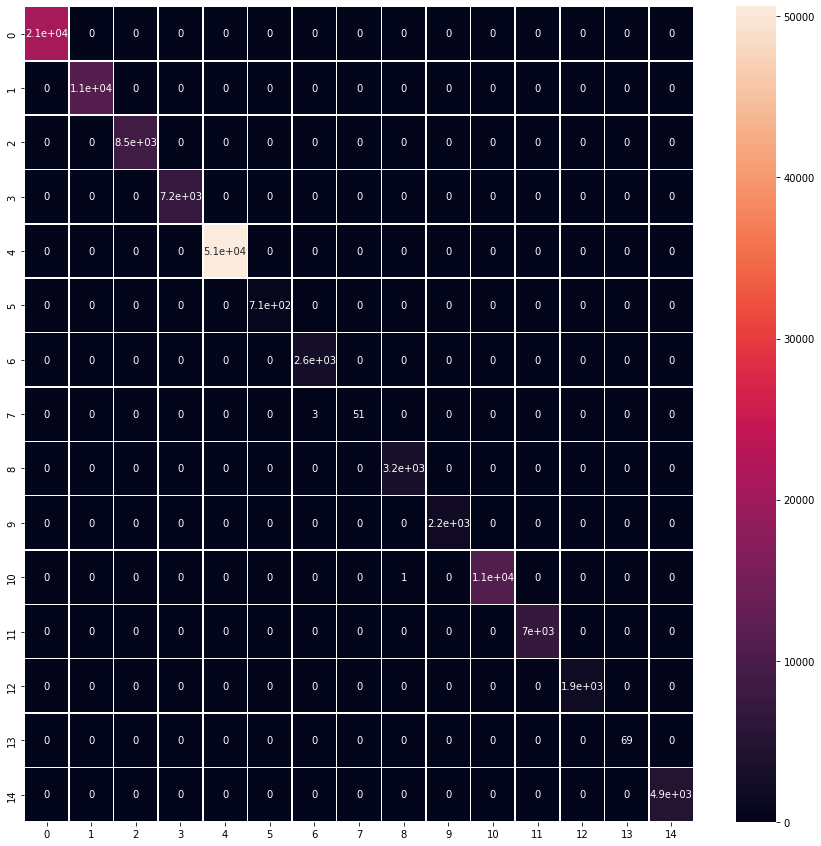

In [ ]:

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)